In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler



/Users/gustavnielsen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("HR_data.csv")
df = df.iloc[:, 1:]

In [5]:
print(df.to_markdown())

|     |   HR_TD_Mean |   HR_TD_Median |   HR_TD_std |   HR_TD_Min |   HR_TD_Max |   HR_TD_AUC |   HR_TD_Kurtosis |   HR_TD_Skew |   HR_TD_Slope_min |   HR_TD_Slope_max |   HR_TD_Slope_mean |   HR_TD_Slope |   TEMP_TD_Mean |   TEMP_TD_Median |   TEMP_TD_std |   TEMP_TD_Min |   TEMP_TD_Max |   TEMP_TD_AUC |   TEMP_TD_Kurtosis |   TEMP_TD_Skew |   TEMP_TD_Slope_min |   TEMP_TD_Slope_max |   TEMP_TD_Slope_mean |   TEMP_TD_Slope |   EDA_TD_P_Mean |   EDA_TD_P_Median |   EDA_TD_P_std |   EDA_TD_P_Min |   EDA_TD_P_Max |   EDA_TD_P_AUC |   EDA_TD_P_Kurtosis |   EDA_TD_P_Skew |   EDA_TD_P_Slope_min |   EDA_TD_P_Slope_max |   EDA_TD_P_Slope_mean |   EDA_TD_P_Slope |   EDA_TD_T_Mean |   EDA_TD_T_Median |   EDA_TD_T_std |   EDA_TD_T_Min |   EDA_TD_T_Max |   EDA_TD_T_AUC |   EDA_TD_T_Kurtosis |   EDA_TD_T_Skew |   EDA_TD_T_Slope_min |   EDA_TD_T_Slope_max |   EDA_TD_T_Slope_mean |   EDA_TD_T_Slope |   EDA_TD_P_Peaks |   EDA_TD_P_RT |   EDA_TD_P_ReT | Round   | Phase   |   Individual |   Puzzler |  

In [5]:
# Split dataset into target variables and features
cols = list(df.columns)
index = cols.index("Frustrated")
X = df.iloc[:, :index]
X["Cohort"] = df["Cohort"]

Y = df.iloc[:, index:]
Y.drop("Cohort", axis=1, inplace=True)

In [6]:
# One hot encode column round and column phase
"""
X = X.replace("phase1", 1) 
X = X.replace("phase2", 2)
X = X.replace("phase3", 3)

X = X.replace("round_1", 1)
X = X.replace("round_2", 2)
X = X.replace("round_3", 3)
X = X.replace("round_4", 4)
"""
X = pd.get_dummies(X, columns=["Cohort", "Round", "Phase"])


In [7]:


# Get all rows with NaN values in X and Y
nan_rows_X = X.isnull().T.any().T
nan_rows_Y = Y.isnull().T.any().T

nan_rows = nan_rows_X | nan_rows_Y

nan_rows = nan_rows[nan_rows == True]

print(X.shape)
print(Y.shape)

X = X.drop(nan_rows.index)
Y = Y.drop(nan_rows.index)

print(X.shape)
print(Y.shape)


(312, 66)
(312, 11)
(307, 66)
(307, 11)


In [102]:
# Keep all columns that has _mean in its name
#filter = X.columns.str.contains("_Mean") | X.columns.str.contains("_Min") | X.columns.str.contains("_Max")
#X = X.loc[:, filter]



In [8]:
print(X.to_markdown())

|     |   HR_TD_Mean |   HR_TD_Median |   HR_TD_std |   HR_TD_Min |   HR_TD_Max |   HR_TD_AUC |   HR_TD_Kurtosis |   HR_TD_Skew |   HR_TD_Slope_min |   HR_TD_Slope_max |   HR_TD_Slope_mean |   HR_TD_Slope |   TEMP_TD_Mean |   TEMP_TD_Median |   TEMP_TD_std |   TEMP_TD_Min |   TEMP_TD_Max |   TEMP_TD_AUC |   TEMP_TD_Kurtosis |   TEMP_TD_Skew |   TEMP_TD_Slope_min |   TEMP_TD_Slope_max |   TEMP_TD_Slope_mean |   TEMP_TD_Slope |   EDA_TD_P_Mean |   EDA_TD_P_Median |   EDA_TD_P_std |   EDA_TD_P_Min |   EDA_TD_P_Max |   EDA_TD_P_AUC |   EDA_TD_P_Kurtosis |   EDA_TD_P_Skew |   EDA_TD_P_Slope_min |   EDA_TD_P_Slope_max |   EDA_TD_P_Slope_mean |   EDA_TD_P_Slope |   EDA_TD_T_Mean |   EDA_TD_T_Median |   EDA_TD_T_std |   EDA_TD_T_Min |   EDA_TD_T_Max |   EDA_TD_T_AUC |   EDA_TD_T_Kurtosis |   EDA_TD_T_Skew |   EDA_TD_T_Slope_min |   EDA_TD_T_Slope_max |   EDA_TD_T_Slope_mean |   EDA_TD_T_Slope |   EDA_TD_P_Peaks |   EDA_TD_P_RT |   EDA_TD_P_ReT |   Individual |   Puzzler |   Cohort_D1_1 |   Coh

<BarContainer object of 11 artists>

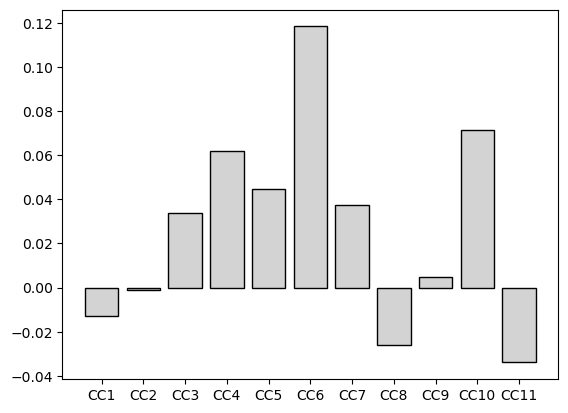

In [39]:
scaler = StandardScaler() 
X_sc = scaler.fit_transform(X)
Y_sc = scaler.fit_transform(Y)


n_comp = 11 #choose number of canonical variates pairs 

bar_titles = ["CC" + str(x) for x in range(1, n_comp+1)] #create list of bar titles

cca = CCA(n_components=n_comp, scale=True) #define CCA
cca.fit(X_sc, Y_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X_sc, Y_sc) #transform our datasests to obtain canonical variates 

comp_corr = [np.corrcoef(X_sc[:, i], Y_sc[:, i])[1][0] for i in range(n_comp)]
plt.bar(bar_titles, comp_corr, color='lightgrey', width = 0.8, edgecolor='k')

In [25]:
np.shape(cca.x_loadings_) #get loadings for canonical variate of X1 dataset

(66, 2)

In [21]:
np.shape(cca.y_loadings_) #get loadings for canonical variate of X2 dataset

(11, 2)

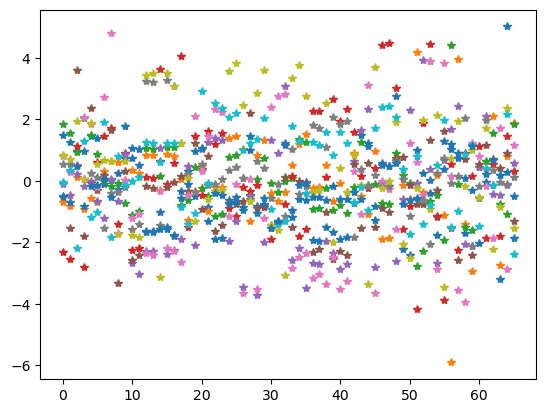

In [44]:
plt.plot(cca.x_loadings_,"*")

In [10]:
coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [Y.columns])
coef_df.index = X.columns

/Users/gustavnielsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


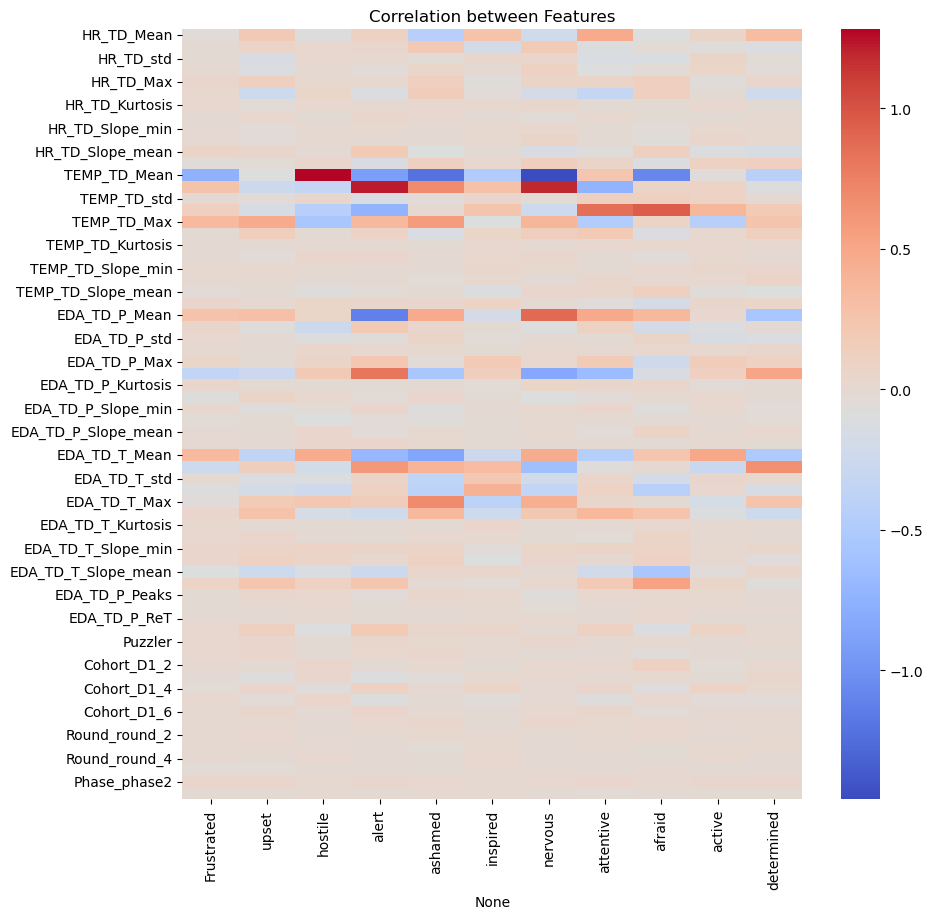

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming coef_df is your DataFrame containing the correlation coefficients
# between features

# Set the figure size
plt.figure(figsize=(10, 10))

# Plot the heatmap
sns.heatmap(coef_df, annot=False, cmap='coolwarm', fmt=".2f", )

# Set the title
plt.title('Correlation between Features')

# Show the plot
plt.show()



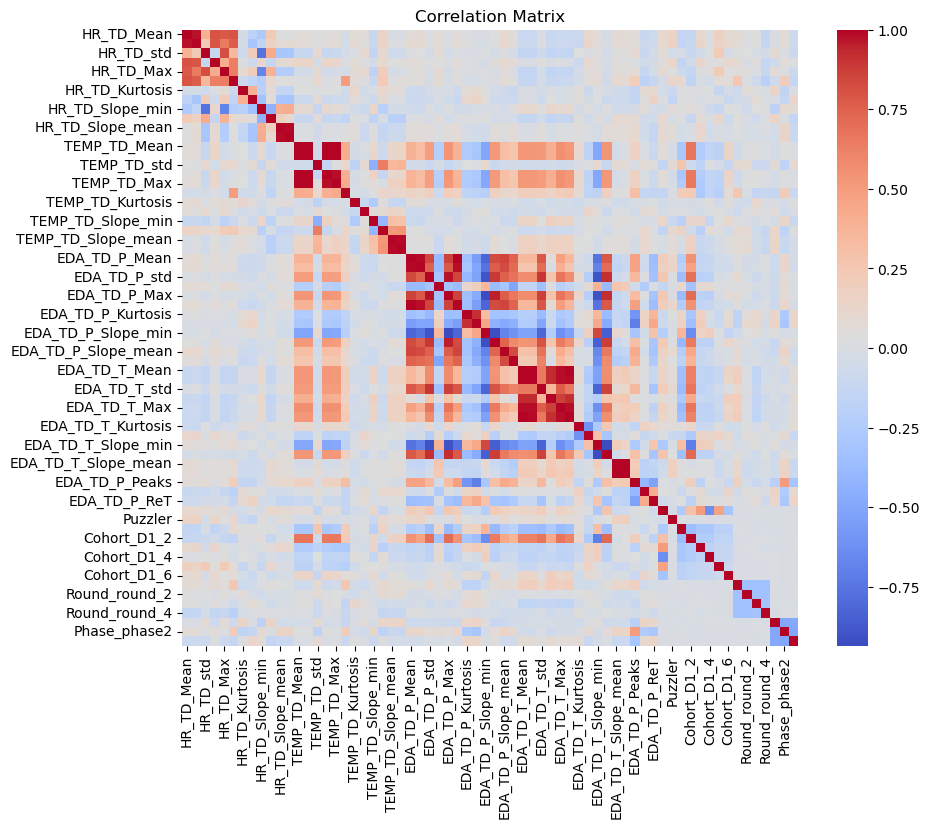

In [13]:
# Create correlation matrix of features

correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()